Case Study on Regression
The given dataset contains price of second-hand Hyundai grand i10 car with 
respect to year of making. Find the best linear relationship between year and 
price. Can you predict the possible price of a 2022 model second-hand grand i10?
Please learn about lasso regression and create a model along with linear
regression. Find out which one is performing better.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\ACER\Downloads\car_age_price.csv")

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.shape

(112, 2)

In [8]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [15]:
data.isna().sum()

Year     0
Price    0
dtype: int64

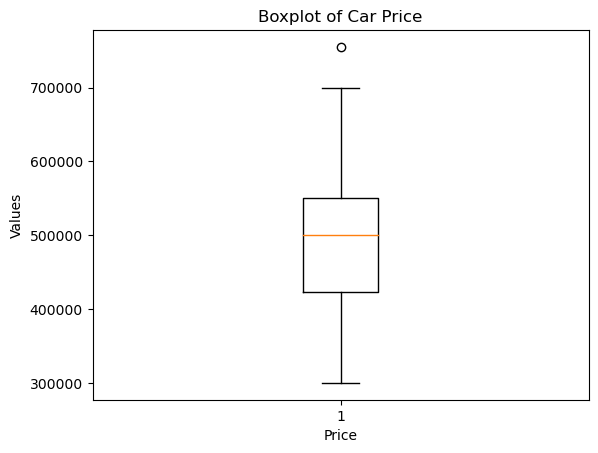

In [20]:
# Create a boxplot
plt.boxplot(data["Price"])

# Set the plot title and labels
plt.title("Boxplot of Car Price")
plt.xlabel("Price")
plt.ylabel("Values")

# Display the plot
plt.show()


In [25]:
# Calculate the IQR
Q1 = data["Price"].quantile(0.25)
Q3 = data["Price"].quantile(0.75)
IQR = Q3 - Q1

# Define the threshold as a multiple of the IQR
threshold = 1.5

# Identify and remove outliers
data_clean = data[(data["Price"] > Q1 - threshold * IQR) & (data["Price"] < Q3 + threshold * IQR)]


In [27]:
# Summary statistics of the cleaned dataset
print(data_clean.describe())


              Year          Price
count   111.000000     111.000000
mean   2016.648649  481423.396396
std       1.621720   87874.563371
min    2013.000000  300000.000000
25%    2015.000000  422500.000000
50%    2017.000000  500000.000000
75%    2017.000000  550000.000000
max    2020.000000  700000.000000


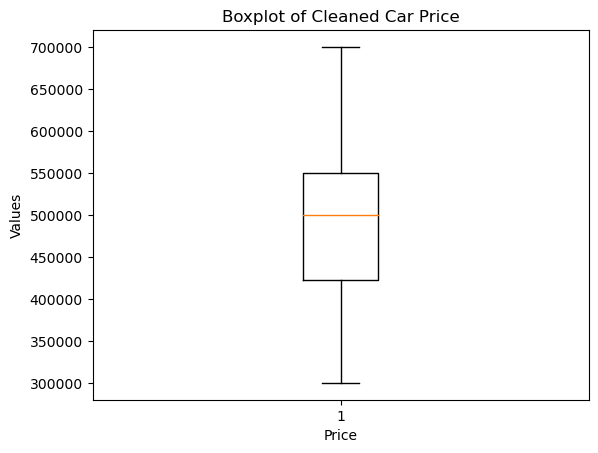

In [29]:
# Boxplot of the cleaned dataset
plt.boxplot(data_clean["Price"])
plt.title("Boxplot of Cleaned Car Price")
plt.xlabel("Price")
plt.ylabel("Values")
plt.show()


 Linear Regression Model

<Axes: >

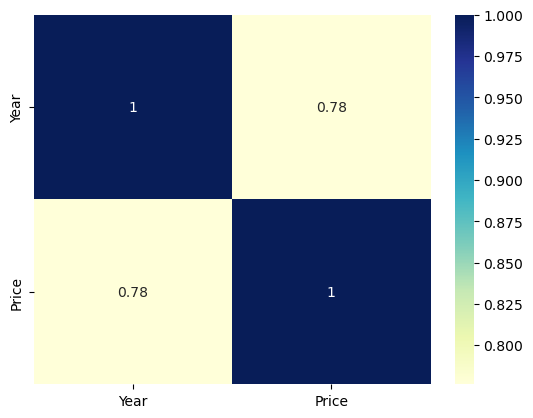

In [34]:
corr_graph = data.corr()
sns.heatmap(corr_graph, cmap='YlGnBu', annot=True)

In [31]:
data.columns

Index(['Year', 'Price'], dtype='object')

In [35]:
X = data.drop('Price', axis=1)
y = data['Price']

In [36]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [114]:
from sklearn.linear_model import LinearRegression

In [115]:
lr = LinearRegression()
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [116]:
from sklearn.metrics import mean_squared_error,r2_score

In [117]:
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

3878767151.0731072
0.4347961632108521


In [118]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [119]:
from sklearn.preprocessing import MinMaxScaler

In [120]:
minmax = MinMaxScaler()

In [121]:
X = minmax.fit_transform(X)

In [122]:
type(X)

numpy.ndarray

In [123]:
x = pd.DataFrame(X)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
lr = LinearRegression()
model = lr.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

3878767151.072697
0.43479616321091186


In [107]:
#"After scaling the features, the mean squared error (MSE) and R-squared (R2) values remained unchanged

Lasso

In [125]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Split the dataset into features (X) and target variable (y)
X = data[["Year"]]  # Input feature (car age)
y = data["Price"]   # Target variable (car price)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Lasso regression model
lasso_reg = Lasso(alpha=0.1)  # Set the regularization parameter (alpha)
lasso_reg.fit(X_train, y_train)

# Make predictions using the Lasso regression model
y_pred = lasso_reg.predict(X_test)

# Calculate the mean squared error (MSE)
lasso_mse = mean_squared_error(y_test, y_pred)


In [126]:
print("Predicted Car Prices:")
print(y_pred)

print("Mean Squared Error (MSE):", lasso_mse)


Predicted Car Prices:
[600775.81201603 505558.75884159 553167.28542881 553167.28542881
 553167.28542881 410341.70566715 505558.75884159 553167.28542881
 600775.81201603 600775.81201603 315124.65249272 505558.75884159
 410341.70566715 648384.33860324 553167.28542881 600775.81201603
 315124.65249272 410341.70566715 505558.75884159 505558.75884159
 505558.75884159 505558.75884159 505558.75884159]
Mean Squared Error (MSE): 4326901608.19506


In [127]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calculate R-squared
lasso_r2 = r2_score(y_test, y_pred)

# Calculate mean absolute error (MAE)
lasso_mae = mean_absolute_error(y_test, y_pred)

# Print R-squared and MAE
print("R-squared:", lasso_r2)
print("Mean Absolute Error (MAE):", lasso_mae)


R-squared: 0.36759381368868127
Mean Absolute Error (MAE): 53534.73464390959


In [128]:
# Create a new dataframe with the year value for prediction
new_data = pd.DataFrame({'Year': [2022]})

# Predict the pricing of the 2022 year model
predicted_price = lasso_reg.predict(new_data)

# Print the predicted price
print("Predicted price for a 2022 year model:", predicted_price[0])


Predicted price for a 2022 year model: 743601.3917776793


In [129]:
from sklearn.linear_model import LinearRegression

# Create and fit the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Create a new dataframe with the year value for prediction
new_data = pd.DataFrame({'Year': [2022]})

# Predict the pricing of the 2022 year model
predicted_price = linear_reg.predict(new_data)

# Print the predicted price
print("Predicted price for a 2022 year model:", predicted_price[0])


Predicted price for a 2022 year model: 743601.6159450412


Linear Regression Model is better for me because R_squared value is  slightly more for linear regression than lasso